### Principal Component Analysis

PCA , ou Análise de Componentes Principais, é uma técnica estatística utilizada para redução de dimensionalidade em conjuntos de dados de alta dimensionalidade. Seu objetivo principal é encontrar um conjunto de novas variáveis (componentes principais) que explicam a maior parte da variabilidade presente nos dados originais. 

Reduzir a dimensionalidade dos dados é uma etapa importante em muitas análises de dados e modelagem estatística, pois ajuda a simplificar a representação dos dados, ganhar performance computacional, melhorar a interpretabilidade dos modelos e evitar problemas como overfitting.

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
x_iris = pd.DataFrame(iris.data, columns= [iris.feature_names])
y_iris = pd.Series(iris.target)

x_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Normalizando as variaveis
normalizador = MinMaxScaler(feature_range=(0,1))
x_norm = normalizador.fit_transform(x_iris)

#PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_norm)

# Treino e teste
x_treino, x_teste, y_treino, y_teste =train_test_split(x_pca,y_iris, test_size=0.3, random_state=14)

# Criando Modelo
modelo = KNeighborsClassifier()
resultado = modelo.fit(x_treino, y_treino)

# Resultado
score = resultado.score(x_teste,y_teste)
print("Acurácia:", round(score,2))

Acurácia: 0.93


Variância Explicada pelos Componentes [0.84136038 0.11751808]


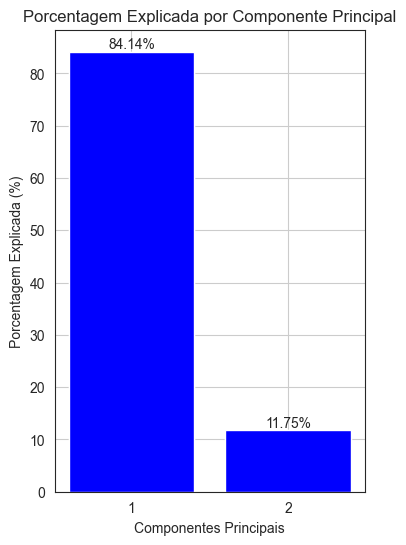

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print("Variância Explicada pelos Componentes", pca.explained_variance_ratio_)

# Obtendo a porcentagem explicada dos componentes principais
porcentagens_explicadas = pca.explained_variance_ratio_

# Índices dos componentes principais
indices = np.arange(len(porcentagens_explicadas)) + 1

# Plotagem do gráfico de barras
sns.set_style("white")  # Definindo o estilo do seaborn
plt.figure(figsize=(4, 6))  # Definindo o tamanho da figura
barras = plt.bar(indices, porcentagens_explicadas * 100, color='blue')

# Adicionando os rótulos dos dados acima das barras
for i, barra in enumerate(barras):
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, f'{porcentagens_explicadas[i]*100:.2f}%', ha='center', va='bottom')

# Plotagem do gráfico de barras
plt.bar(indices, porcentagens_explicadas * 100, color='blue')
plt.xlabel('Componentes Principais')
plt.ylabel('Porcentagem Explicada (%)')
plt.title('Porcentagem Explicada por Componente Principal')
plt.xticks(indices)
plt.grid(True)
plt.show()